# Mutation and Migration

## Mutation and Evolution 

Previously we learned about how selection can change the frequencies of
alleles and genotypes in populations. Selection typically eliminates
variation from within populations. (The general exception to this claim
is with the class selection models we have called "balancing\" selection
where alleles are maintained in the population by overdominance,
habitat-specific selection, or frequency dependent selection). If
selection removes variation, soon there will be no more variation for
selection to act on, and evolution will grind to a halt, right? This
might be true if it were not for the reality of mutation which will
restore genetic variation eliminated by selection. Thus, mutations are
the fundamental raw material of evolution.

The basic model of mutation that we will study is one way mutation. This
is when one allele through mutation can turn in to another such that

$$\begin{aligned}
A_1 \stackrel{u}\longrightarrow A_2
\end{aligned}$$

$u$ here represents the mutation rate, the probability that a mutation
from $A_1$ to $A_2$ occurs during a meiosis.

It should be obvious that mutation will change allele frequencies. This
is true because there is a constant flux from $A_1$ to $A_2$ purely as a
result of this mutation process. We can study the change in allele
frequency due to mutation in a very similar way to how we studied the
change in allele frequency due to selection. Consider a population with
frequency of the $A_1$ allele $p$. In the next generation, after a round
of mutation, each $A_1$ allele must have been $A_1$ in the current
generation and it must not have mutated. That is 

$$\begin{aligned}
    p' = p (1-u).
\end{aligned}$$ 

Now lets turn our attention to the
change in allele frequency in one generation due to mutation as we did
previously for selection 

$$\begin{aligned}
    \Delta_up & = & p' - p \\
     & = & p(1-u) -p \\
     & = & -up \\
\end{aligned}$$

 notice that our notation-- $\Delta_up$
-- emphasizes the source of the change in allele frequency is mutation. 
Let's plot this as a function of $p$ 

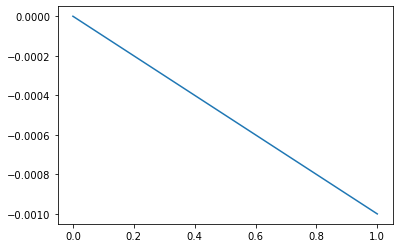

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def delta_p_u(u, p):
    return -u * p

x = np.linspace(0, 1, 100)
frequencies = delta_p_u(x, 0.001)
plt.plot(x, frequencies)

right! _decreasing_ for all $p$ except the case where $p = 0$!

--------------

**Exercise** write a function to explore the dynamics of allele frequency dynamics of this model over time. It should take an initial frequency and a mutation rate as it's input, and output 
the allele frequency in subsequent generations (perhaps the number of generations could be an input)

---------------------

This sort of unidirectional mutation acts to consistently decrease the
frequency of the $A_1$ allele from generation to generation. If we
instead were to study two way mutation, the mutational flux would depend
on the proportional rates to and from $A_1$. So mutation, although it is
a random process with respect to target, leads to deterministic effects
on allele frequencies. Neat huh?

Mutation rates per generation are very very small. You know this
intuitively- think about cloning plants from cuttings. In *Drosophila*,
which is one of the best studied animals from the perspective of rates
of spontaneous mutation, the mutation rate per generation per nucleotide
is on the order of $10^{-9}$. This means that mutation changes the
frequency of alleles at a very slow rate. If we assume that there is
sufficiently strong selection against the $A_2$ allele (i.e.
$w_{11} >> w_{22}$), then we can further approximate our change in
allele frequency due to mutation 

$$\begin{aligned}
\Delta_up  & = & -up \\
  & = & -u + qu \\
 & \approx & -u, 
\end{aligned}$$ 

because $q \approx 0$. So in the case
of a deleterious $A_2$ allele, we can see that the change in allele
frequency due to mutation is independent of allele frequencies. This is
our first hint that mutation and selection might combine in interesting
and important ways.


# Mutation-Selection Balance 

We can imagine mutation and selection as opposing forces which might
come to some equilibrium in terms of the number or frequency of
deleterious alleles within a population. To make this concrete think
about the human genetic disease cystic fibrosis (CF). CF is a very
serious genetic disorder in which a transmembrane protein in lung
epithelium cells called CFTR is non-functional. Hundreds, if not
thousands of separate mutations in CFTR lead to CF, thus we could
imagine that there is a certain, appreciable rate of mutation to CF. If
each of these mutations is deleterious (i.e. they cause disease) then
over generations they should be selected out of the population. Thus
mutation will inject CF mutations into the population, but selection
will remove them- can we study this as an equilibrium process?

Our approach will be to study each of our evolutionary forces in
isolation, and then combine them to figure out how they interact. Let's
start by considering the change in allele frequency due to selection
that we studied in lecture 7, but this time we will approximate it under
the assumption that $q \approx 0$ 

$$\begin{aligned}
\Delta_sp  & = &\frac{pqs[ph + q(1-h)]}{\bar{w}} \\
& \approx & qhs 
\end{aligned}$$ 

This approximation goes down the road
because when $q \approx 0$, $p \approx 1$, $\bar{w} \approx 1$, and we
can ignore all terms of order $q^2$.

Now lets combine the forces of selection and mutation on the change in
frequency of $A_1$ using the approximations we have just derived
(equations 3 and 5). At equilibrium that change in allele frequency due
to the combined actions of mutation and selection must equal zero. That
is 

$$\begin{aligned}
    0 & = & \Delta_up + \Delta_sp \\
    & \approx & -u + qhs
\end{aligned}$$ 

so the equilibrium frequency of
the $A_2$ is 

$$\begin{aligned}
    \hat{q} \approx \frac{u}{hs}
\end{aligned}$$

Thus we see that
deleterious (e.g. disease) allele frequencies are determined by both the
mutation rate to those alleles and their selective effects in
heterozygotes. As we saw earlier, new mutations overwhelmingly are found
in heterozygous states, so it's perhaps not surprising that $h$ should
dominate the fate of deleterious alleles.

In [1]:
%load_ext slim_magic

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, SVG

In [44]:
%%slim_stats_reps_cstack 100 --out neutral
initialize()
{
    // set the overall mutation rate
    // no mutation in this simulation
    initializeMutationRate(0.01);
    // m1 mutation type: neutral
    initializeMutationType("m1", 0.5, "f", 0.0);
    // single locus simulation
    // g1 genomic element type: uses m1 probability 1
    initializeGenomicElementType("g1", c(m1), c(1.0));
    // uniform chromosome of length 1 site
    initializeGenomicElement(g1, 0, 0);
    // uniform recombination along the chromosome
    initializeRecombinationRate(0);
    suppressWarnings(T);
}

// create a population of 100 individuals
1 {
    sim.addSubpop("p1", 100);
    // sample 100 haploid genomes 
    target = sample(p1.genomes, 100);
    // add a mutation to those genomes
    // H_0 = 0.5 here
    target.addNewMutation(m1,0, 0);
    cat("generation,p\\n");
}
1:1000 late(){
    // allele freq of A_1 allele in current gen
    freqs = sim.mutationFrequencies(p1);
    // each gen print out the gen and the allele freqs 
    catn(sim.generation + "," + freqs[0]);
    }
// run to generation 0
300 late() {
    sim.simulationFinished();
    }


In [47]:
%%slim_stats_reps_cstack 100 --out selection
// set up a single locus simulation of selection
initialize()
{
    // set the overall mutation rate
    // no mutation in this simulation
    initializeMutationRate(0.01);
    // m1 mutation type: neutral
    initializeMutationType("m1", 0.5, "f", -0.1);
    // single locus simulation
    // g1 genomic element type: uses m1 probability 1
    initializeGenomicElementType("g1", c(m1), c(1.0));
    // uniform chromosome of length 1 site
    initializeGenomicElement(g1, 0, 0);
    // uniform recombination along the chromosome
    initializeRecombinationRate(0);
    suppressWarnings(T);
}

// create a population of 100 individuals
1 {
    sim.addSubpop("p1", 100);
    cat("generation,p\\n");
}
1:1000 late(){
    // allele freq of A_1 allele in current gen
    freqs = sim.mutationFrequencies(p1);
    // each gen print out the gen and the allele freqs 
    if( length(freqs) > 0)
        catn(sim.generation + "," + freqs[0]);
    }
// run to generation 0
300 late() {
    sim.simulationFinished();
    }

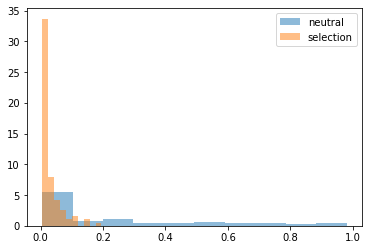

In [50]:
plt.hist(neutral[-1:].values.flatten(), density=True,alpha=0.5, label="neutral")
plt.hist(selection[-1:].values.flatten(), density=True,alpha=0.5, label="selection")
plt.legend()
plt.show()